# Exercise: Exploratory Data Analysis

After importing your data in R and making it tidy, it is tempting to start right away with your analysis. However, real-world data usually contain systematic errors, missing values, mistakes in encoding, biases, and other unexpected problems that you should be mindful about. If you fail to discover these problems, more often your analyses will be flawed and your conclusions are false. Other times, when you explore your data, you might discover some interesting relationship, pattern, or information that was not included in your original research question that may generate new hypothesis. Thus, **exploratory data analysis** is one of the important aspects in data analysis, but sadly overlooked by many.  

When you finish this exercise, you will learn how to:
1. perform exploratory data analysis
2. use the **ggplot2** package in visualizing your data 

## Visualization with ggplot2 package

In this notebook, you will use the functions in **ggplot2** package to explore and visualize the COVID-19 dataset. Load the packages in **tidyverse**, which include **ggplot2**.

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ──────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Read the **ggplot2** documentation. After browsing the documentation, you will be overwhelmed by the number of functions and arguments present in the **ggplot2** package. To help you in recalling these different functions when you create your figures, you can download the [ggplot2 cheatsheet](https://raw.githubusercontent.com/rstudio/cheatsheets/master/data-visualization-2.1.pdf).

In [2]:
# Read the documentation of ggplot2 package
help(package = "ggplot2")

Next, load the merged data that you worked on your last exercise to explore the relationship between the cumulative number of COVID-19 cases and population in each country.

In [3]:
# Load merged data
covid  <- read_csv("merged_data.csv",
                   col_types = cols(
                       `Country/Region` = col_character(),
                       date = col_date(),
                       cases = col_double(),
                       population = col_double(),
                       rate = col_double()
                   )
                  )

Check the data structure using the **`glimpse( )`** or **`str( )`** function.

In [4]:
glimpse(covid)

Rows: 65,513
Columns: 5
$ `Country/Region` <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghan…
$ date             <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 202…
$ cases            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ population       <dbl> 38928000, 38928000, 38928000, 38928000, 38928000, 38…
$ rate             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


For this analysis, the latest data on the cumulative number of cases are only needed. Thus, under the **`date`** column, you will only subset the latest observations. 

In [5]:
# Subset the latest data 
covid  <- covid %>% 
            filter(date == max(date))

head(covid)

Country/Region,date,cases,population,rate
<chr>,<date>,<dbl>,<dbl>,<dbl>
Afghanistan,2020-12-29,51350,38928000,131.91019
Albania,2020-12-29,57146,2850000,2005.12281
Algeria,2020-12-29,98988,43851000,225.73716
Andorra,2020-12-29,7919,77000,10284.41558
Angola,2020-12-29,17371,32866000,52.85401
Antigua and Barbuda,2020-12-29,158,98000,161.22449


Check for countries with missing values. **`NA`** is common when working with real datasets. Here, use the **`filter_all( )`** function to subset rows of interest, which in this case are the rows containing missing values. The **`any_vars( )`** function will perform the operation on any columns and the dot **`.`** operator will act as a shortcut to replicate this operation for all variables in a data frame. This is a lazy alternative to writing the names of each column in your code.

In [6]:
covid %>%
   filter_all(any_vars(is.na(.)))

Country/Region,date,cases,population,rate
<chr>,<date>,<dbl>,<dbl>,<dbl>
Bahamas,2020-12-29,7846,NA,NA
Brunei,2020-12-29,152,NA,NA
Burma,2020-12-29,123153,NA,NA
Congo (Brazzaville),2020-12-29,6908,NA,NA
Congo (Kinshasa),2020-12-29,17182,NA,NA
Czechia,2020-12-29,685202,NA,NA
Diamond Princess,2020-12-29,712,NA,NA
Egypt,2020-12-29,135233,NA,NA
Eritrea,2020-12-29,1220,NA,NA


What do you think are the reasons why there are missing values in your merged dataset?

In [7]:
# Answer: 

From this point, the decision to make with respect to missing values would depend on your dataset and the research question. If the rows are not needed and its deletion does not affect the analysis, then you can drop these missing values. However, if the rows are important in your analysis, then you need to go back to merging your data and try to understand why you obtained **`NA`** and fix the problem.

Here, just pretend that you decided to drop these rows with missing values. Run the cell below to remove rows with **`NA`**.

In [8]:
covid  <- covid %>%
            drop_na()

head(covid)

Country/Region,date,cases,population,rate
<chr>,<date>,<dbl>,<dbl>,<dbl>
Afghanistan,2020-12-29,51350,38928000,131.91019
Albania,2020-12-29,57146,2850000,2005.12281
Algeria,2020-12-29,98988,43851000,225.73716
Andorra,2020-12-29,7919,77000,10284.41558
Angola,2020-12-29,17371,32866000,52.85401
Antigua and Barbuda,2020-12-29,158,98000,161.22449


## Components of a graph

In creating a graph, the minimum components required are:
1. **Data** - your dataset in tidy format 
2. **Geometry** - the geometry component dictates the type of plot to be generated such as scatterplots, barplots, histograms,  boxplots, etc.
3. **Aesthetic mapping** - this component indicates the values for the x-axis, y-axis, color, etc.

The other components of a graph such title, legends, labels, scale, etc. will added as layers, which will be described below. The codes described below will guide you in constructing a graph step by step.

## **`ggplot( )`** function

The first step in generating a ggplot2 graph is to define a ggplot object. When you run the **`ggplot( )`** function, this will initialize the graph. The first argument in this function is the data, which in this example is the object **`covid`**.  

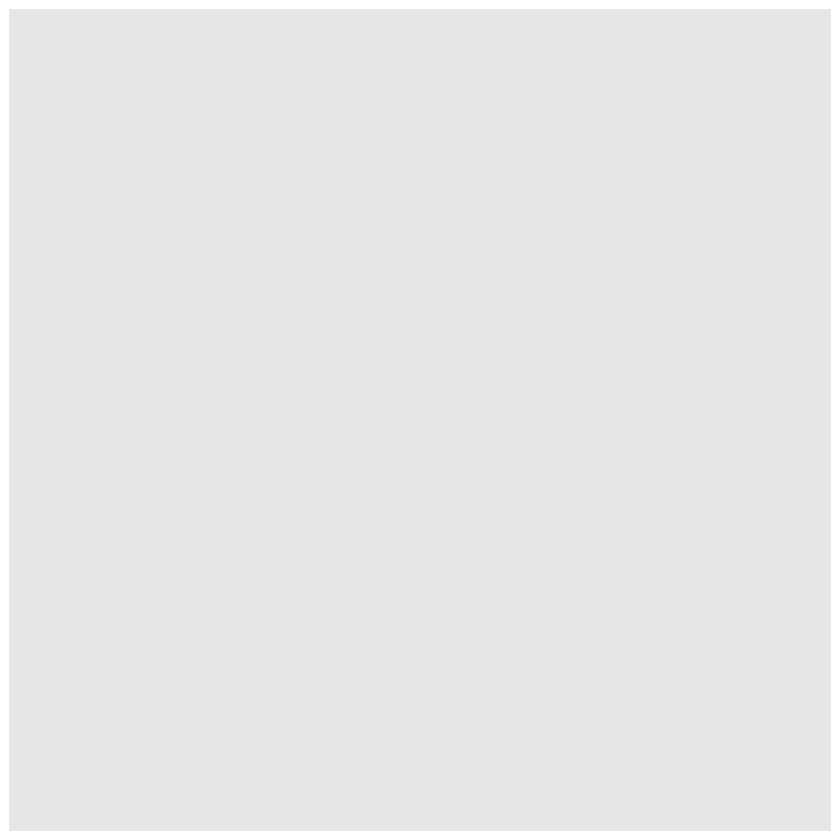

In [9]:
ggplot(data = covid)

Notice that after you run the cell above, it generated a plot, which in this case is a blank slate (gray background) because you did not specify the geometry nor type of plot to be created. 

## `ggplot` layers

In ggplot, graphs can be created by adding layers. Layers can define which type of plot to draw, what scales to use, where to put the legends, etc. To add layers, use the plus sign, **`+`**. Your code will look like this:

data %>% `ggplot( )` + layer_1 + layer_2 + layer_3 + ... + layer_n

## Geometry

In this graph, you are going to create a scatter plot since you are going to look inti the relationship between two continuous variables, the number of population and the number of COVID-19 cases. For scatter plots, the geometry function to use is **`geom_point( )`**. The geometry function is usually the first layer in your code.

### Aesthetics function, **`aes( )`**

The **`aes( )`** function connects data with the plot to be generated. This is known as the **aesthetic mappings**. The outcome of this function is often used as the argument of a geometry function. Here, you will define which variables to assign for the **`x`** and **`y`** axes, colors, etc. Run the cell below to draw a scatter plot of the cumulative number of COVID-19 cases versus population.

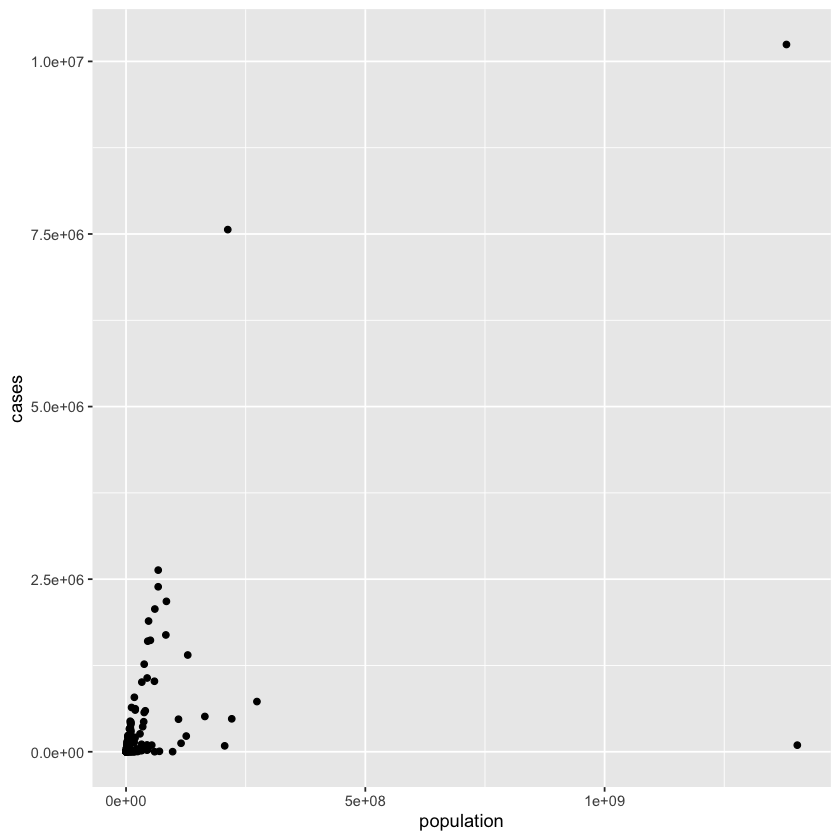

In [10]:
covid %>% ggplot() + 
            geom_point(aes(x = population, y = cases)) 

Note that the points are crowded in the lower left side of the plot with a big space in the middle. You can easily guess the two countries on the upper right and lower right hand side of plot. These two countries have large populations in billions -- one country is on the top 10 of the COVID-19 charts, while the other country has controlled the spread of the virus. Can you also guess which country is on the upper left hand side of the plot?

## Labels

The next layer that you are going to add is the label to each point to indicate the name of the country using the **`label`** argument of the **`geom_text( )`** function. You can use the **`geom_label( )`** function to add label, however, the label will be inside a rectangle, which in this case will clutter the plot. Run the cell below to add labels in the plot.

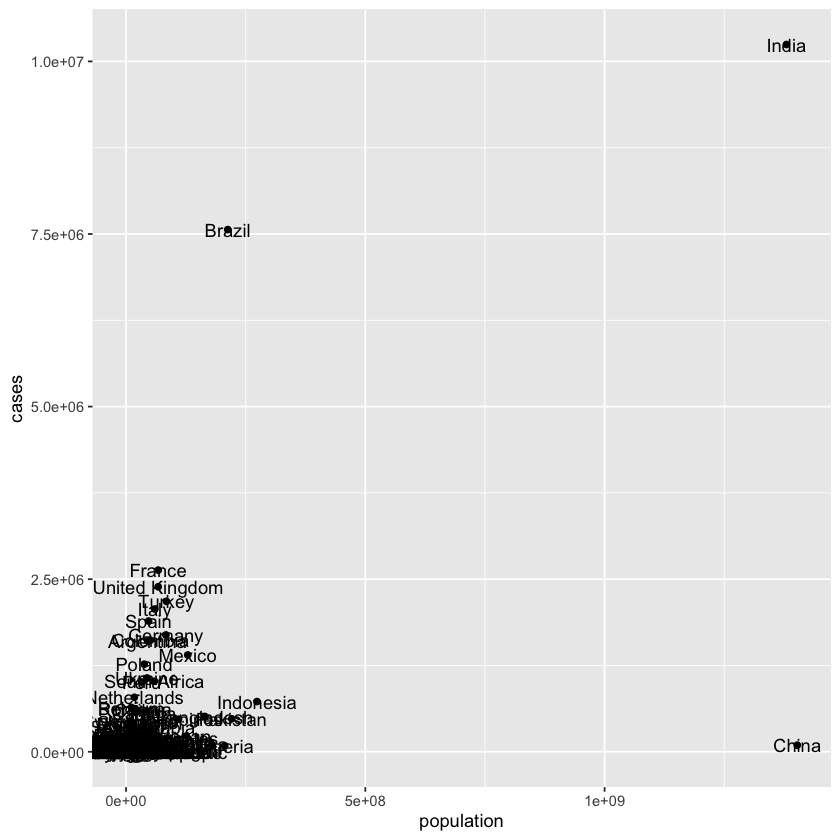

In [11]:
covid %>% ggplot() + 
            geom_point(aes(x = population, y = cases)) + 
            geom_text(aes(x = population, y = cases, label = `Country/Region`))

## Adding other layers

### Scale

Since your dataset deals with population number, which is in millions for some countries and in billions for China and India. You can change the scale of the plot to logarithmic scale using the **`scale_x_continuous( )`** and **`scale_y_continuous( )`** functions. Use the **`trans`** argument to transform the numbers to **`log10`** scale. You can do this by adding these layers to your code.

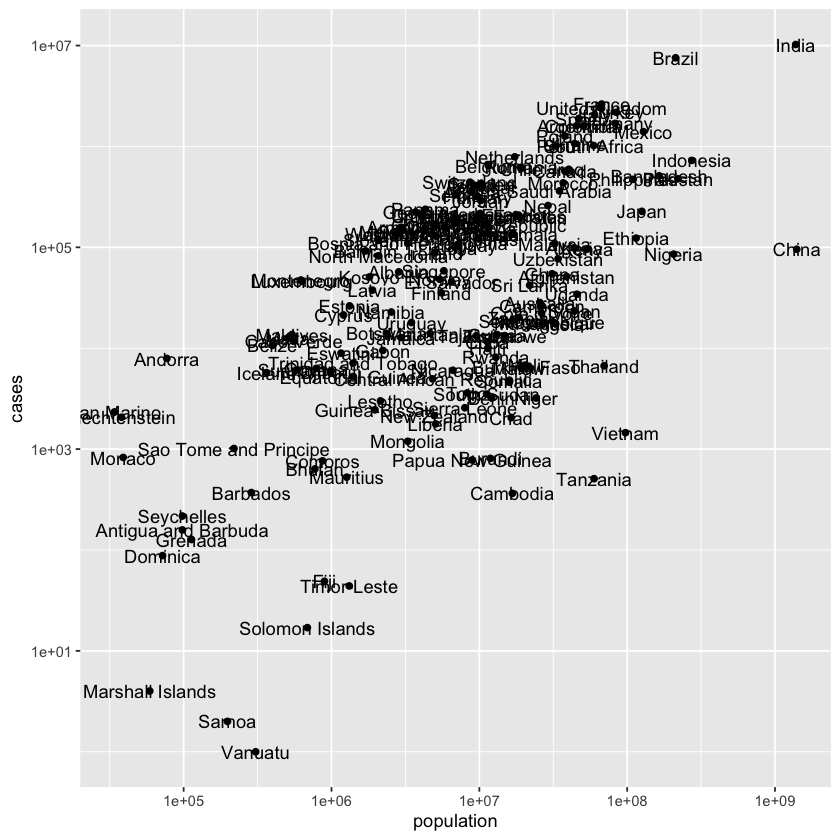

In [12]:
covid %>% ggplot() + 
            geom_point(aes(x = population, y = cases)) +
            geom_text(aes(x = population, y = cases, label = `Country/Region`)) +
            scale_x_continuous(trans = "log10") +
            scale_y_continuous(trans = "log10")

Now, the points are no longer crowded in one corner of the plot. However, the names of the countries are still difficult to read in some parts of the plot. 

Another way of transforming the values to **`log10`** scale is to use the **`scale_x_log10( )`** and **`scale_y_log10( )`** functions. If you do not like and find it confusing the scientific notation as labels in both the x- and y-axes, then you can use the **`trans_breaks( )`** and **`trans_format( )`** functions of the **`scales`** package to modify the labels.

Installing package into ‘/Users/claudius/Rlibs’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0v/_2vsqk3j1nxcfb13d3g7g5nc0000gn/T//Rtmpnwt6eO/downloaded_packages



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




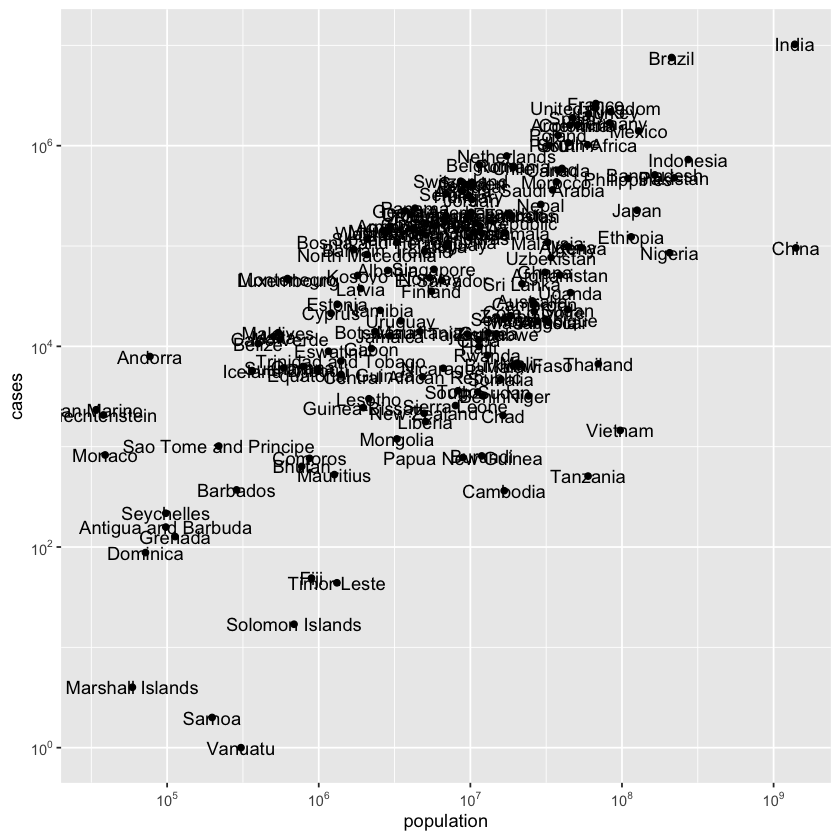

In [13]:
# Install and load the scales package
install.packages("scales")
library(scales, quietly = TRUE)

covid %>% ggplot() + 
            geom_point(aes(x = population, y = cases)) +
            geom_text(aes(x = population, y = cases, label = `Country/Region`)) +
            scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
            scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x)))

### Size

You can adjust the size of the points by using the **`size`** argument in the **`geom_point( )`** function. Play around with the values to obtain the desired the size.

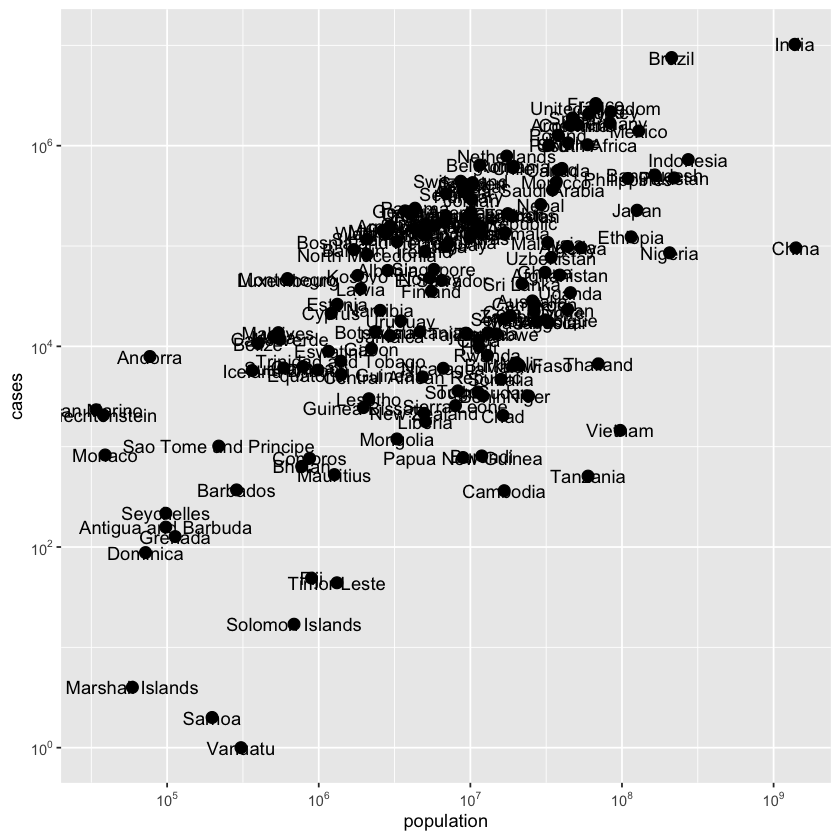

In [14]:
covid %>% ggplot() + 
            geom_point(aes(x = population, y = cases), size = 3) +
            geom_text(aes(x = population, y = cases, label = `Country/Region`)) +
            scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
            scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x)))

### Nudge

To move the text labels so that it will not overlap with the points, use the **`nudge_x( )`** or **`nudge_y( )`** function. Play around with the values until text labels is well separated from its corresponding point. Use positive values to nudge the labels up (y-axis) or right (x-axis), or use negative values to move the labels down or left.

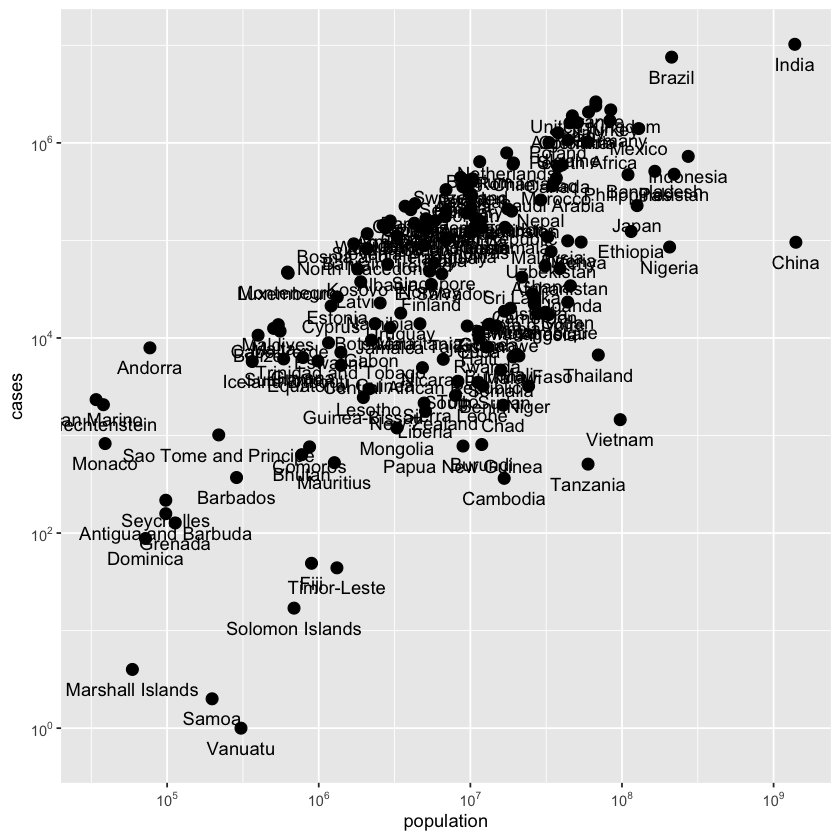

In [15]:
covid %>% ggplot() + 
            geom_point(aes(x = population, y = cases), size = 3) +
            geom_text(aes(x = population, y = cases, label = `Country/Region`), nudge_y = -0.2) +
            scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
            scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x)))

You can also create a ggplot object to create a global aethetic mapping. 

In [16]:
p  <- covid %>% 
        ggplot(aes(x = population, y = cases, label = `Country/Region`))

Then, add the layers to make your code easy to read. You can rewrite your previous code as:

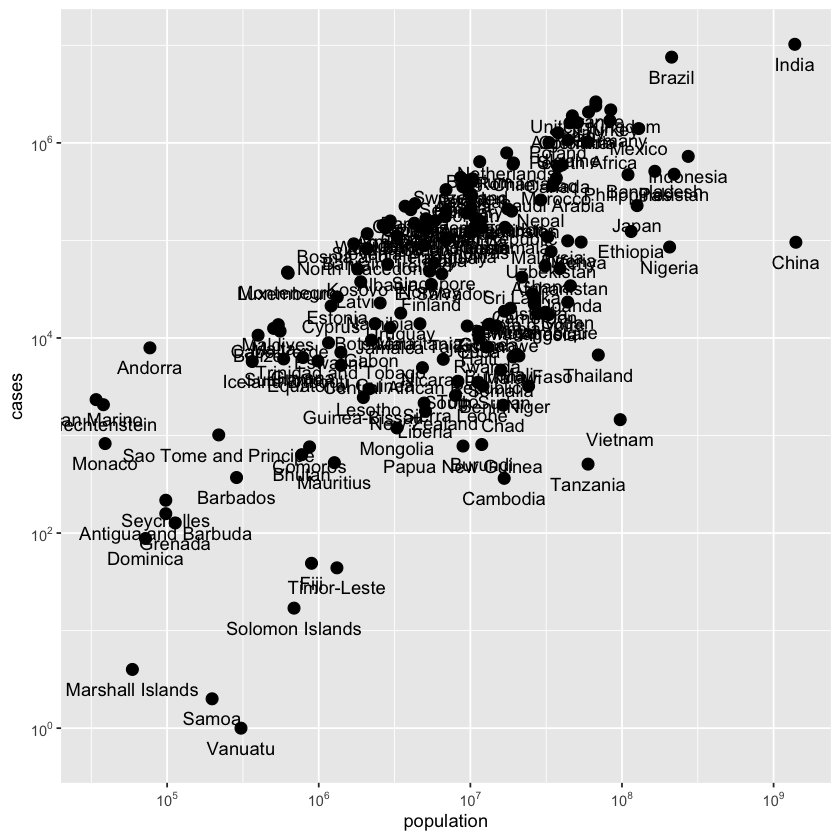

In [17]:
p + scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    geom_point(size = 3) +
    geom_text(nudge_y = -0.2)

## Titles and labels

You can add a title to your plot and change the labels on x- and y-axes using following functions: **`ggtitle( )`**, **`xlab( )`**, and **`ylab( )`** 

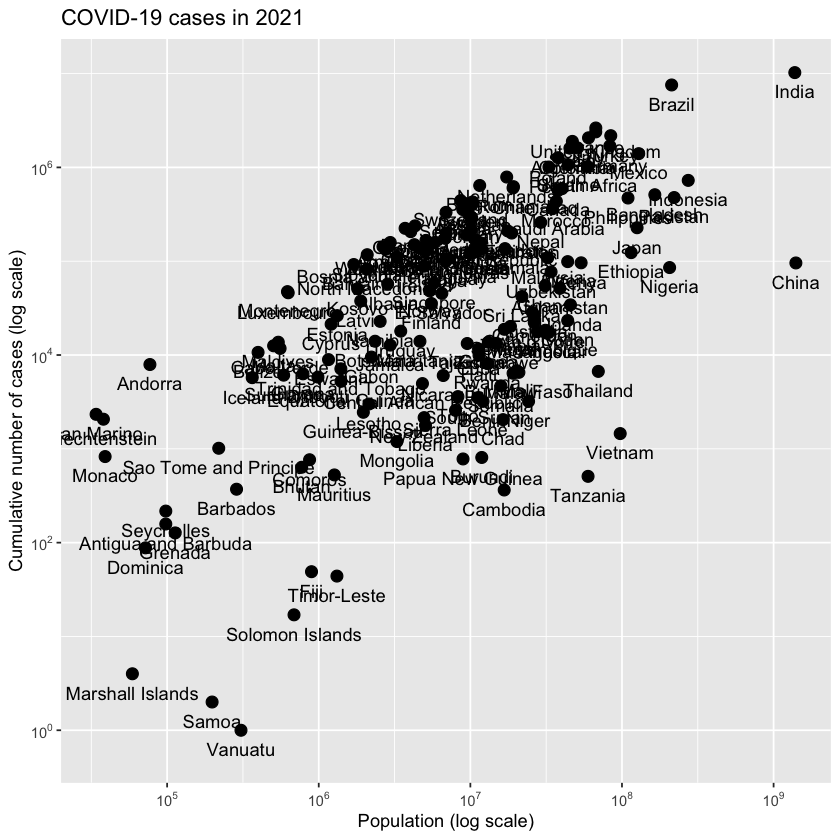

In [18]:
p + scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))) +
    geom_point(size = 3) +
    geom_text(nudge_y = -0.2) +
    ggtitle("COVID-19 cases in 2021") +
    xlab("Population (log scale)") +
    ylab("Cumulative number of cases (log scale)")

## Color

You can change the color of the points using the **`color`** argument of the **`geom_point( )`** function. Run the cell below to create a ggplot object except this time you remove the **`geom_point`** layer for this example to illustrate the concept.

In [19]:
p  <- covid %>% 
        ggplot(aes(x = population, y = cases, label = `Country/Region`)) + 
        scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
            labels = trans_format("log10", math_format(10^.x))) +
        scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
            labels = trans_format("log10", math_format(10^.x))) +
        geom_text(nudge_y = -0.2) +
        ggtitle("COVID-19 cases in 2021") +
        xlab("Population (log scale)") +
        ylab("Cumulative number of cases (log scale)")

Then, define the **`geom_point( )`** function using **`size`** and **`color`** arguments.

For the values in the **`color`** argument, you can use the name of the colors, e.g. `blue`, `red`, `green`, etc. Alternatively, to have more control of the color, you can input the corresponding hexadecimal color values, e.g. `#3182bd`, `#de2d26`, `#2ca25f`, etc. Checkout [Brewers palette](https://colorbrewer2.org/) for color coordination. Play around with your favorite colors in the cell below.

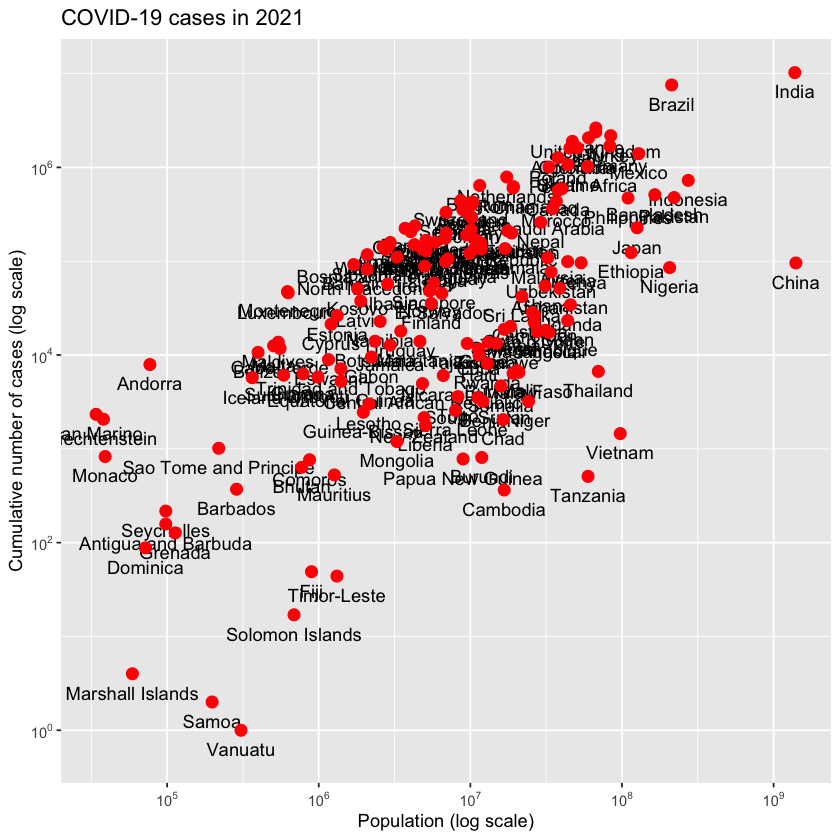

In [20]:
p + geom_point(size = 3, color = 'red')

You can control the transparency of your figure using the **`alpha`** argument. The range of values is from 0 to 1 with 0=transparent while 1=solid color. This is useful if the data points are close to each other. Play around with the values to obtain the desired transparency.

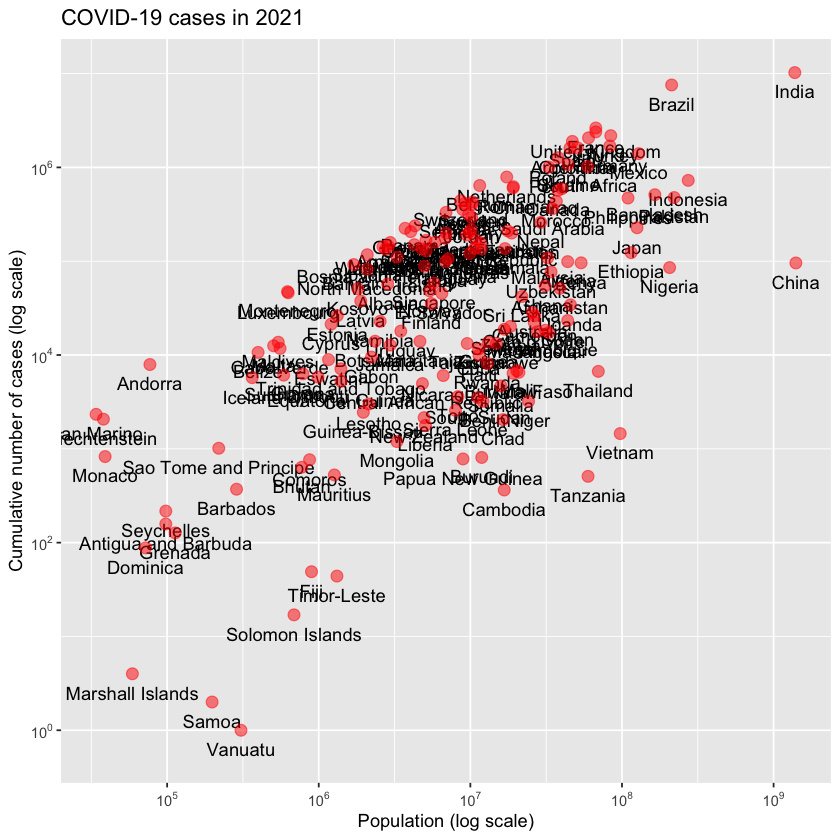

In [21]:
p + geom_point(size = 3, color = 'red', alpha = 0.5)

## **ggrepel** package

The **`ggrepel`** package is useful when you want the text labels to repel away from each other in order to minimize crowding in the plot.

In [22]:
# Install the ggrepel package
install.packages("ggrepel")

Installing package into ‘/Users/claudius/Rlibs’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0v/_2vsqk3j1nxcfb13d3g7g5nc0000gn/T//Rtmpnwt6eO/downloaded_packages


In [23]:
# Load the ggrepel package
library(ggrepel)

Run the cell below to create a ggplot object, this time removing the **`geom_text`** layer for illustration purposes.

In [24]:
p  <- covid %>% 
        ggplot(aes(x = population, y = cases, label = `Country/Region`)) + 
        scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
            labels = trans_format("log10", math_format(10^.x))) +
        scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
            labels = trans_format("log10", math_format(10^.x))) +
        ggtitle("COVID-19 cases in 2021") +
        xlab("Population (log scale)") +
        ylab("Cumulative number of cases (log scale)") +
        geom_point(size = 3, color = 'red', alpha = 0.5)

Use the **`geom_text_repel( )`** function to repel the text labels. 

Warning message:
“ggrepel: 108 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


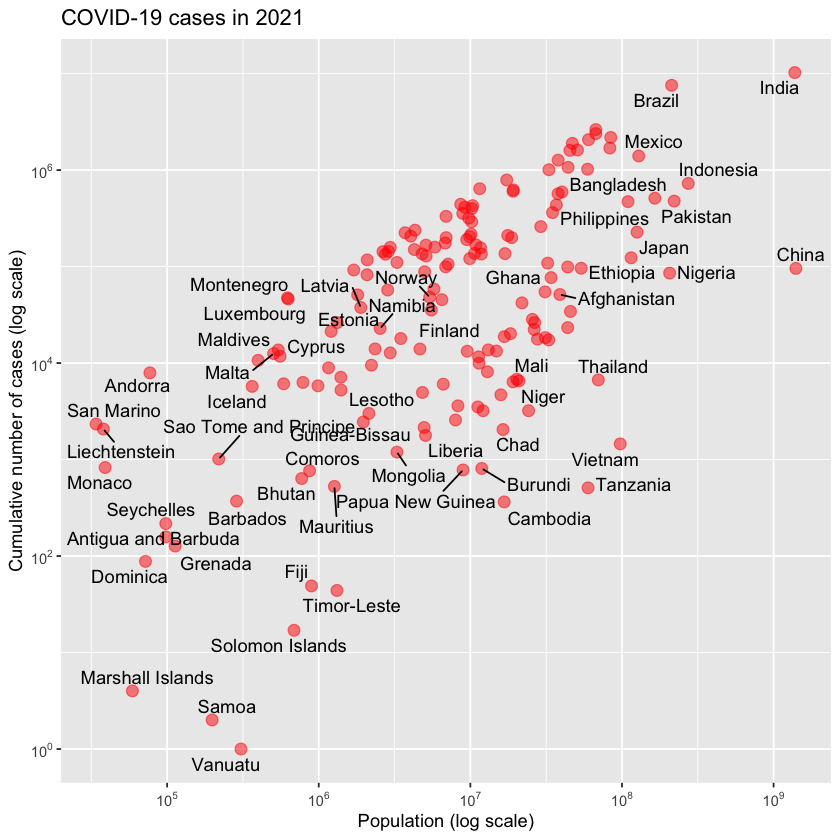

In [25]:
p + geom_text_repel()

Now, the plot is no longer crowded. Notice, also that some labels were not shown from the warning message. If you want to control which countries to annotate, you can create an object containing a list of countries to highlight in your figure. Create an object containing the names of countries that will appear as labels in your figure. Feel free to add/subtract the number of countries.

In [26]:
my_list <- c("China", "India", "Japan", "Indonesia", "Malaysia", "Thailand", "Vietnam", "Philippines")

In the **`geom_text_repel( )`** function, do not show the labels, instead show the names of countries that you wish to highlight as listed in the object that you created. 

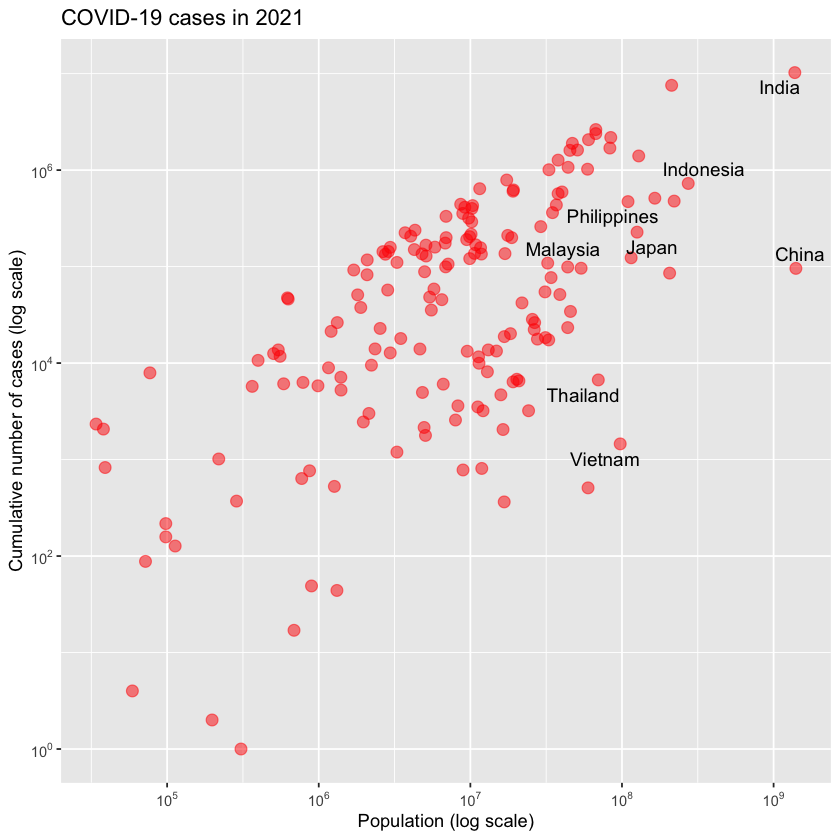

In [27]:
p + geom_text_repel(size = 4, 
                    show.legend = FALSE,
                    data = filter(covid, `Country/Region` %in% my_list))

## **ggthemes** package

If you find the default background of your plot boring, then you can use the **`ggthemes`** package to change the look of your plot.

In [28]:
# Install ggthemes package
install.packages("ggthemes")

Installing package into ‘/Users/claudius/Rlibs’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/0v/_2vsqk3j1nxcfb13d3g7g5nc0000gn/T//Rtmpnwt6eO/downloaded_packages


In [29]:
# Load the ggthemes package
library(ggthemes)

Check the **`ggthemes`** documentation to see the different themes available.

In [30]:
# Read the ggthemes documentation
help(package = "ggthemes")

Run the cell below to change the theme of your plot to "Clean ggplot theme". Play around with the code until you find the theme that you like. 

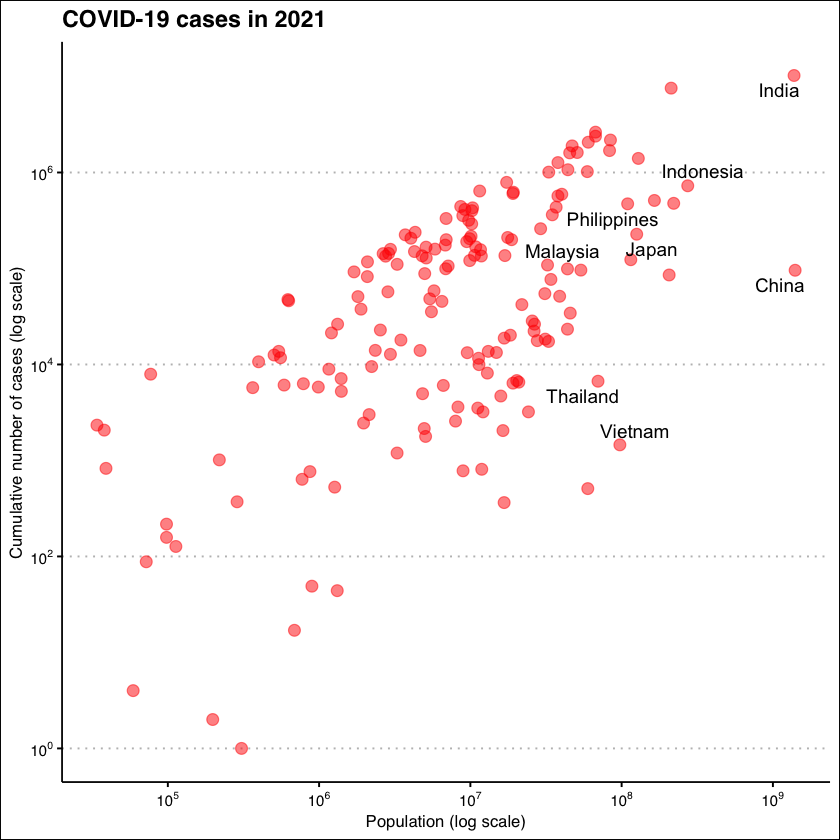

In [31]:
p + geom_text_repel(size = 4, 
                    show.legend = FALSE,
                    data = filter(covid, `Country/Region` %in% my_list)) +
    theme_clean()

Now, that's a better graph. Remember, the goal here is to visualize the relationship of the variables in your data. The figures that you generate during Exploratory Data Analysis are just rough figures and are meant for your eyes only. You will learn how to generate graphs for publication or presentation in a conference in future exercises. 

## Putting it together

Now, run the code below to generate the plot from scratch. 

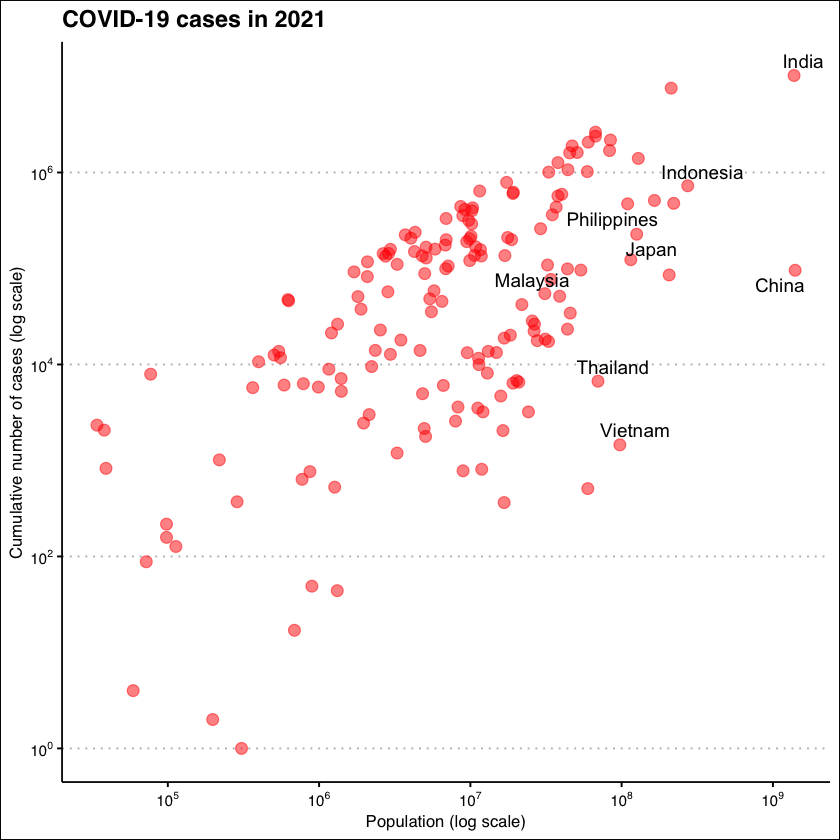

In [32]:
# List of countries to highlight in the graph
my_list <- c("China", "India", "Japan", "Indonesia", "Malaysia", "Thailand", "Vietnam", "Philippines")

# Generate a scatter plot
covid %>% 
    ggplot(aes(x = population, y = cases, label = `Country/Region`)) + 
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
    ggtitle("COVID-19 cases in 2021") +
    xlab("Population (log scale)") +
    ylab("Cumulative number of cases (log scale)") +
    geom_point(size = 3, color = 'red', alpha = 0.5) +
    geom_text_repel(size = 4,
                    show.legend = FALSE,
                    data = filter(covid, `Country/Region` %in% my_list)) +
    theme_clean()